<a href="https://colab.research.google.com/github/Lamiya7/Task_E387/blob/main/Task_E387.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

In [2]:
import json
with open('/content/drive/MyDrive/ML projekat/challenge_graph (1).json', 'r') as f:   #assigns it to the file object f
  data= json.load(f)

In [3]:
print(data)

{'nodes': [{'id': '48633953191', 'q1': 266, 'q2': 0.496241}, {'id': '1438155667', 'q1': 2060, 'q2': 0.135922}, {'id': '37754729913', 'q1': 1696, 'q2': 0.034788}, {'id': '45694946584', 'q1': 6882, 'q2': 0.120314}, {'id': '8048097398', 'q1': 1031, 'q2': 0}, {'id': '246800250', 'q1': 971, 'q2': 0.161689}, {'id': '18866083059', 'q1': 1016, 'q2': 0.088583}, {'id': '27449814345', 'q1': 1455, 'q2': 0.028179}, {'id': '12762152189', 'q1': 658, 'q2': 0.1231}, {'id': '46105172901', 'q1': 7661, 'q2': 0.065266}, {'id': '5693320415', 'q1': 1138, 'q2': 0.060633}, {'id': '429008541', 'q1': 1654, 'q2': 0.0526}, {'id': '3104137586', 'q1': 1656, 'q2': 0.155193}, {'id': '55714809789', 'q1': 35911, 'q2': 0.307154}, {'id': '382387161', 'q1': 3624, 'q2': 0.201159}, {'id': '1957459102', 'q1': 2689, 'q2': 0.150614}, {'id': '35984678', 'q1': 9954, 'q2': 0.063444}, {'id': '555363279', 'q1': 2338, 'q2': 0.080838}, {'id': '14766909', 'q1': 4481, 'q2': 0.039723}, {'id': '854242655', 'q1': 69842, 'q2': 0.073602}, {'

In [4]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import networkx as nx 

Vertex and edge counts

In [6]:
def get_vertex_count(graph):      #function takes graph object as an argument
  return graph.number_of_nodes()  #returns the number of nodes/vertices in the graph

def get_edge_count(graph):        # graph as an argument
  return graph.number_of_edges()  # returns number of edges in the graph

graph= nx.Graph()  #create an empty object graph

node_labels = [node['id'] for node in data['nodes']] #iterate over nodes in id 
graph.add_nodes_from(node_labels)   #add nodes to the graph

graph.add_edges_from((link['source'], link['target']) for link in data['links'])
#creates edges by iterating over source and target from link source


print(get_vertex_count(graph)) #print vertex number in the graph
print(get_edge_count(graph))   #print edge number in the graph 


3506
3756


Vertex degree

In [7]:
def get_vertex_degrees(graph): 
  return dict(graph.degree())   #returns a dictionary that returns the number of edges connected to a node 


degrees= get_vertex_degrees(graph)
for vertex, degree in degrees.items(): #iterate over key-value pairs in degrees using items function 
  print(f"{vertex}: {degree}")         #print key-value pairs 

48633953191: 45
1438155667: 50
37754729913: 38
45694946584: 50
8048097398: 50
246800250: 50
18866083059: 50
27449814345: 50
12762152189: 50
46105172901: 50
5693320415: 50
429008541: 90
3104137586: 50
55714809789: 50
382387161: 50
1957459102: 50
35984678: 70
555363279: 96
14766909: 93
854242655: 70
7176701743: 70
9245623768: 70
7644102419: 94
2859517: 70
1373705266: 111
195738888: 50
1187523512: 50
1023340677: 51
40507939065: 70
45085100035: 70
1660812944: 112
447825325: 90
35094604: 70
30028715978: 50
405387573: 117
3145709864: 50
356793922: 50
180647838: 115
267735244: 100
1166106601: 71
819819023: 50
2839121: 98
231040053: 70
20934432266: 71
3425534353: 72
13817938: 124
1281592476: 70
447997840: 98
37704595: 125
5550915984: 71
1407455621: 50
254197705: 50
520781652: 72
24970812: 100
56010353: 1
10446954062: 1
1461679662: 1
1782523938: 1
1695753418: 1
2935685012: 1
2846588: 1
5353089060: 1
1815894041: 1
221222696: 1
3918232748: 1
1440691802: 1
381018429: 1
367843285: 1
3047543213: 1
5

Test if the graph is connected

In [8]:
def is_connected(graph):  #defining a function and argument(graph)
  return nx.is_connected(graph)   #function from network library checks if graph is connected 

print(is_connected(graph)) 

False


Count and create the subgraphs of G

In [9]:
def get_subgraphs(graph):
  subgraphs = []  #create an empty list
  for component in nx.connected_components(graph):  #nx.connected_components(graph) returns set of nodes (set - connected component of a graph)
                                                    #for loop iterates over the sets of nodes 
   subgraphs.append(graph.subgraph(component)) #creates a subgraph from a connected component of a graph and adds it to a list of subgraphs
  return subgraphs

subgraphs = get_subgraphs(graph)
print(f"Number of subgraphs: {len(subgraphs)}")


Number of subgraphs: 4


Count the isolates and show them

In [10]:
def get_isolates(graph):   #function takes in a graph object and identifies the isolate nodes in the graph
  isolates= list(nx.isolates(graph))   #nx.isolates(graph) returns a list of the isolate nodes in the graph, then the list() function converts this list to a regular Python list
  print(f"Number of isolates: {len(isolates)}")
  print("Isolate nodes:", isolates)

Eigenvector centrality


In [11]:
def get_eigenvector_centrality(graph):  #graph is input value, where eigenvector centrality of the nodes is computed 
  centrality = nx.eigenvector_centrality(graph)     #creating the list of centrality
  sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)   #strting centrality list
  return sorted_centrality


# identify the most important nodes in a graph based on their eigenvector centrality scores

eigenvector_centrality = get_eigenvector_centrality(graph)
print("Top 10 nodes by eigenvector centrality:")
for node, centrality in eigenvector_centrality[:10]:
  print(f"{node}: {centrality:.4f}")

Top 10 nodes by eigenvector centrality:
37704595: 0.4069
13817938: 0.3620
447825325: 0.3445
195738888: 0.1681
1660812944: 0.1291
1373705266: 0.1176
24970812: 0.1119
12372862: 0.1003
20934432266: 0.0961
8048097398: 0.0954


Optional

In [12]:
def hierarchical_clustering(graph):
  linkage_matrix = linkage(nx.to_numpy_matrix(graph), method='complete')
##perform hierarchical clustering on the input graph using the complete linkage
# method and convert the resulting linkage matrix to numpy array

  tree = to_tree(linkage_matrix) #convert the numpy array to a tree using the to_tree function
  G = nx.Graph()
  labels = {}  # #create an empty dictionary to hold the labels of the nodes


  #if the current node is a leaf, add a node with the node 
  #id to the graph object and label it with the node id
  def traverse(node, G, labels):
    if node.is_leaf():
      node_id = str(node.id)
      G.add_node(node_id)
      labels[node_id] = str(node_id)

#if the current node is not a leaf, add a new node to the Graph object and label 
#it with an empty string, and add edges to its children nodes      
    else:
      node_id = str(len(labels))
      labels[node_id] = ""
      for child_node in node.get_children():
        child_node_id = traverse(child_node, G, labels)
        G.add_edge(node_id, child_node_id)
    return node_id
  traverse(tree, G, labels) #call the traverse function to traverse the tree and add nodes and edges to the graph object
  pos = nx.spring_layout(G) #generate the node positions using the spring layout algorithm
  plt.figure(figsize=(12, 6))
  nx.draw_networkx(G, pos=pos, labels=labels, with_labels=True)
  plt.show()


<ipython-input-13-d352c5527036>:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(to_numpy_array(graph), method='complete')


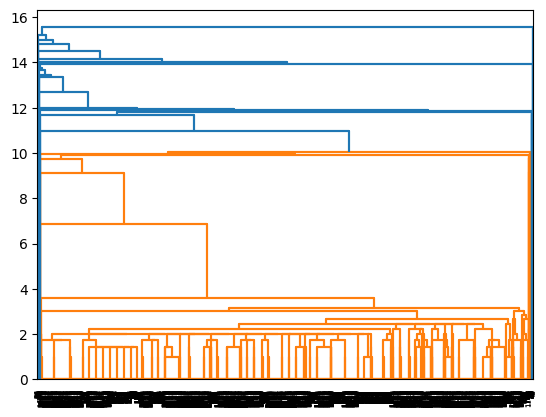

In [13]:
from scipy.cluster.hierarchy import linkage, dendrogram 
from networkx.convert_matrix import to_numpy_array #importing a function for converting a networkx graph to a numpy array
import matplotlib.pyplot as plt

def hierarchical_clustering(graph):
    linkage_matrix = linkage(to_numpy_array(graph), method='complete')
#generating a linkage matrix using complete linkage clustering on the numpy array representation of the graph


    dendrogram(linkage_matrix) # Plotting a dendrogram using the linkage matrix.
    dendrogram(linkage_matrix)
    plt.show()

hierarchical_clustering(graph)


In [14]:
G = nx.Graph() #create a new empthy graph object


for node in data['nodes']:  #loop through nodes i data dictionary 
    G.add_node(node['id'], q1=node['q1'], q2=node['q2']) #add nodes to the graph


for link in data['links']:  #loop through link in data
    G.add_edge(link['source'], link['target'], id=link['id']) #takes id attribute from the link data, adds an edge between those nodes 

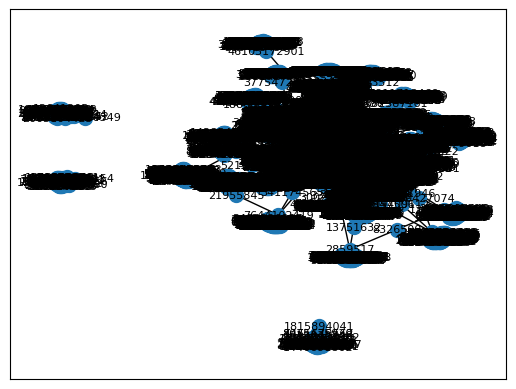

In [15]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(G) #set node positions

nx.draw_networkx(G, pos, with_labels=True, node_size=100, font_size=8) #draw the graph

plt.show()

Betweenness centrality

In [16]:
def get_betweenness_centrality(graph): #compute the betweenness centrality of nodes in the graph
  centrality = nx.betweenness_centrality(graph)
#sort nodes in the graph by their betweenness centrality value in descending order

  sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
  return sorted_centrality
#return a list of tuples, where each tuple contains a node and its corresponding betweenness centrality value

betweenness_centrality = get_betweenness_centrality(graph)
print("Top 10 nodes by betweenness centrality:")
for node, centrality in betweenness_centrality[:10]:
  print(f"{node}: {centrality:.4f}")

Top 10 nodes by betweenness centrality:
447825325: 0.5094
37704595: 0.1639
13817938: 0.1580
7644102419: 0.1241
20934432266: 0.0975
3425534353: 0.0849
555363279: 0.0773
21955845: 0.0763
1660812944: 0.0708
1373705266: 0.0697


In [17]:
def get_isolates(graph):
  return list(nx.isolates(graph))

isolates = get_isolates(graph)
print(f"There are {len(isolates)} isolates:")
print(isolates)

There are 0 isolates:
[]


<ipython-input-18-84566297398e>:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distances)


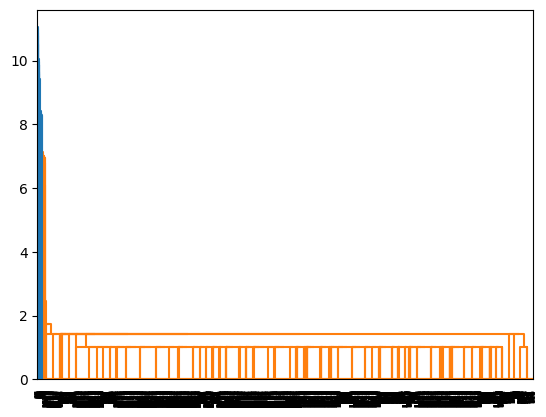

In [18]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

def hierarchical_clustering(graph):
  distances = nx.to_numpy_array(graph)
  linkage_matrix = linkage(distances)
  dendrogram(linkage_matrix)
  plt.show()

hierarchical_clustering(graph)